In [1]:
# #Abhay and Alex Big Data Project

# # # Run only ONCE: Install necessary Python libraries

# # # # Install pandas for data manipulation
#  !pip install pandas

# # # # Install scikit-learn for machine learning models and metrics
#  !pip install scikit-learn

# # # # Install matplotlib for plotting the ROC curve
#  !pip install matplotlib

#!pip install xgboost

In [2]:
# Load necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Step 1 Load the dataset 
file_path = 'loan_approval_dataset.csv'
loan_df = pd.read_csv(file_path)
loan_df.head(15)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
# Step 2: Identify columns with missing values
missing_values = loan_df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Series([], dtype: int64)


In [5]:
if 'loan_id' in loan_df.columns:
    print("Column 'loan_id' exists in the DataFrame.")
else:
    print("Column 'loan_id' not found in the DataFrame.")


Column 'loan_id' exists in the DataFrame.


In [6]:
# Step 3: Drop irrelevant columns
loan_df = loan_df.drop(['loan_id'], axis=1)

In [7]:
if 'loan_id' in loan_df.columns:
    print("Column 'loan_id' exists in the DataFrame.")
else:
    print("Column 'loan_id' not found in the DataFrame.")


Column 'loan_id' not found in the DataFrame.


In [8]:
#Strip blank spaces from column headers
loan_df.columns = loan_df.columns.str.strip().str.lower().str.replace(' ', '_')


In [9]:
negative_values = loan_df['residential_assets_value'][loan_df['residential_assets_value'] < 0]

# Display the rows with negative values, if any
print("Negative values found:\n", negative_values)

# Count of negative values
print("Number of negative values:", len(negative_values))

Negative values found:
 59     -100000
196    -100000
559    -100000
702    -100000
737    -100000
784    -100000
904    -100000
1089   -100000
1163   -100000
1350   -100000
1392   -100000
1773   -100000
1806   -100000
1866   -100000
1933   -100000
1950   -100000
2707   -100000
3019   -100000
3164   -100000
3180   -100000
3431   -100000
3730   -100000
3747   -100000
3962   -100000
4076   -100000
4130   -100000
4206   -100000
4243   -100000
Name: residential_assets_value, dtype: int64
Number of negative values: 28


In [10]:
#Get rid of negative values
loan_df['residential_assets_value'] = loan_df['residential_assets_value'].apply(lambda x: max(x, 0))

In [11]:
negative_values = loan_df['residential_assets_value'][loan_df['residential_assets_value'] < 0]

# Check once more to ensure code to remove negative values worked
print("Negative values found:\n", negative_values)

# Count of negative values
print("Number of negative values:", len(negative_values))

#Expected output: 0 negative values

Negative values found:
 Series([], Name: residential_assets_value, dtype: int64)
Number of negative values: 0


In [12]:
# Check the unique values in the education column
print("Unique values in 'education':", loan_df['education'].unique())


Unique values in 'education': [' Graduate' ' Not Graduate']


In [13]:
print(loan_df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [14]:
loan_df['education'] = loan_df['education'].str.strip()

In [15]:
loan_df['self_employed'] = loan_df['self_employed'].str.strip()

In [16]:
print("Unique values in 'education':", loan_df['education'].unique())


Unique values in 'education': ['Graduate' 'Not Graduate']


In [17]:
# Encoding categorical variables
loan_df['education'] = loan_df['education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_df['self_employed'] = loan_df['self_employed'].map({'Yes': 1, 'No': 0})
# loan_df['self_employed'] = loan_df['self_employed'].map({'Yes': 1, 'No': 0})
# loan_df['loan_status'] = loan_df['loan_status'].map({'Approved': 1, 'Rejected': 0})


In [18]:
# Display the first few rows of the encoded columns
print(loan_df[['education', 'self_employed', 'loan_status']].head())


   education  self_employed loan_status
0          1              0    Approved
1          0              1    Rejected
2          1              0    Rejected
3          1              0    Rejected
4          0              1    Rejected


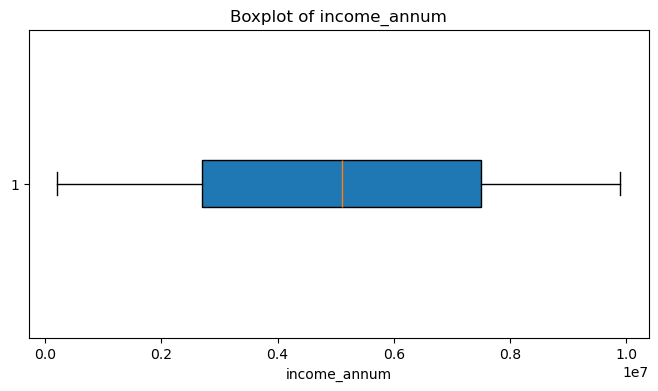

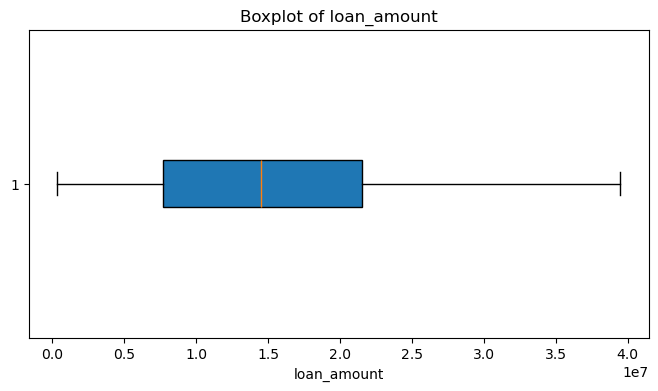

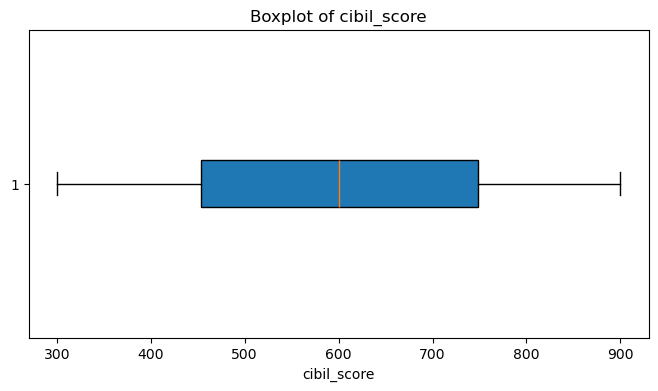

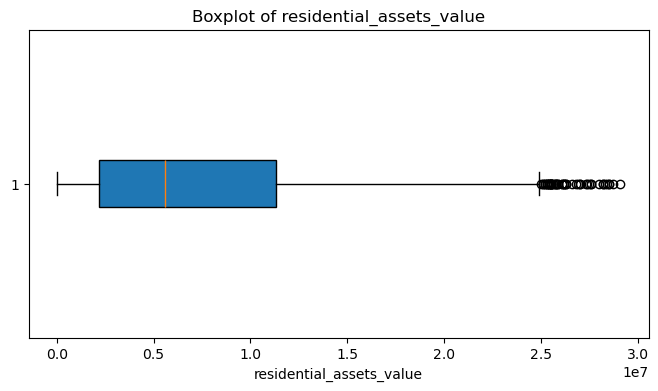

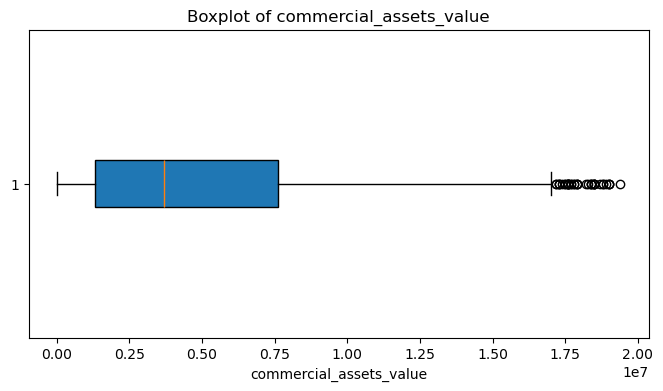

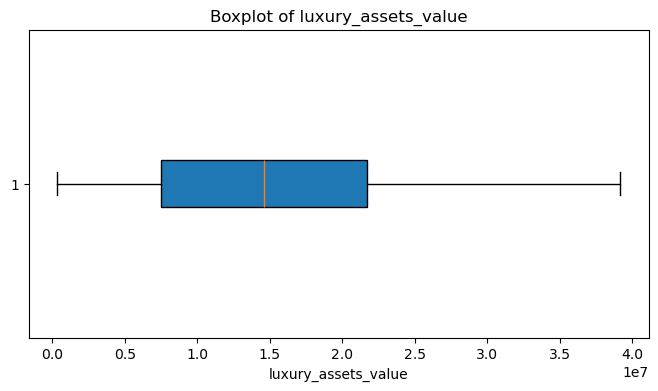

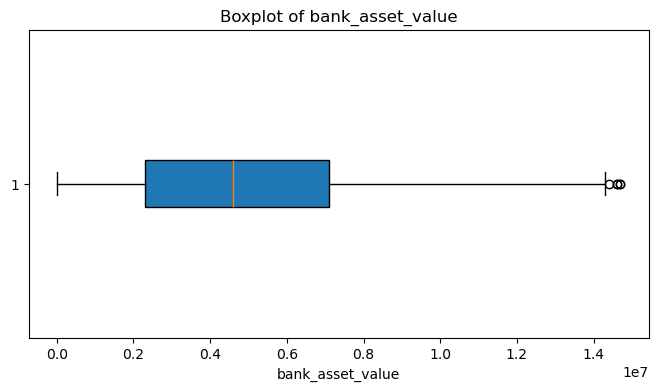

In [19]:
import matplotlib.pyplot as plt

# List of numeric columns to visualize
columns_to_check = [
    'income_annum', 
    'loan_amount', 
    'cibil_score', 
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]

# Plot boxplots for each column
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.boxplot(loan_df[column], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [20]:
# Function to calculate and display outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]

# Columns to check for outliers
columns_to_check = [
    'income_annum', 
    'loan_amount', 
    'cibil_score', 
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]

# Display outliers for each column
for column in columns_to_check:
    outliers = find_outliers(loan_df, column)
    print(f"Outliers in '{column}':")
    print(outliers)
    print(f"Number of outliers in '{column}': {len(outliers)}")
    print("-" * 50)


Outliers in 'income_annum':
Series([], Name: income_annum, dtype: int64)
Number of outliers in 'income_annum': 0
--------------------------------------------------
Outliers in 'loan_amount':
Series([], Name: loan_amount, dtype: int64)
Number of outliers in 'loan_amount': 0
--------------------------------------------------
Outliers in 'cibil_score':
Series([], Name: cibil_score, dtype: int64)
Number of outliers in 'cibil_score': 0
--------------------------------------------------
Outliers in 'residential_assets_value':
82      25500000
98      25900000
123     26800000
228     25500000
262     25600000
693     25400000
714     28300000
781     26300000
892     27600000
905     28700000
919     25300000
924     25800000
953     25500000
956     25300000
987     28200000
997     25200000
1002    25800000
1397    25700000
1419    25500000
1468    27000000
1591    28500000
1625    26300000
1965    28400000
1997    27000000
2185    25900000
2318    28500000
2384    26600000
2412    2620000

In [21]:
# Function to calculate bounds for multiple columns
def calculate_outlier_bounds(df, columns):
    bounds = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[column] = (lower_bound, upper_bound)
    return bounds

# Remove outliers in a single operation
def remove_all_outliers(df, bounds):
    for column, (lower, upper) in bounds.items():
        df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

# Define columns to check and calculate bounds
columns_to_check = [
    'income_annum', 
    'loan_amount', 
    'cibil_score', 
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]
bounds = calculate_outlier_bounds(loan_df, columns_to_check)

# Remove outliers
loan_df = remove_all_outliers(loan_df, bounds)

# Check updated shape
print(f"Shape after removing outliers: {loan_df.shape}")



Shape after removing outliers: (4178, 12)


In [22]:
# Initialize the scaler
scaler = MinMaxScaler()

In [23]:
# List of numerical columns to scale
scaled_columns = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
'residential_assets_value', 'commercial_assets_value',
'luxury_assets_value', 'bank_asset_value']

In [24]:
# Apply scaling
loan_df [scaled_columns] = scaler.fit_transform(loan_df[scaled_columns])

In [25]:
print(loan_df [scaled_columns].head())

   income_annum  loan_amount  loan_term  cibil_score  \
1      0.402062     0.303571   0.333333     0.195000   
2      0.917526     0.750000   1.000000     0.343333   
3      0.824742     0.775510   0.333333     0.278333   
4      0.989691     0.609694   1.000000     0.136667   
5      0.474227     0.336735   0.444444     0.031667   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
1                  0.108434                 0.129412             0.218509   
2                  0.285141                 0.264706             0.848329   
3                  0.730924                 0.194118             0.591260   
4                  0.497992                 0.482353             0.748072   
5                  0.273092                 0.488235             0.344473   

   bank_asset_value  
1          0.230769  
2          0.895105  
3          0.552448  
4          0.349650  
5          0.356643  


In [26]:
print (loan_df [scaled_columns].min())
print (loan_df [scaled_columns].max ())

income_annum                0.0
loan_amount                 0.0
loan_term                   0.0
cibil_score                 0.0
residential_assets_value    0.0
commercial_assets_value     0.0
luxury_assets_value         0.0
bank_asset_value            0.0
dtype: float64
income_annum                1.0
loan_amount                 1.0
loan_term                   1.0
cibil_score                 1.0
residential_assets_value    1.0
commercial_assets_value     1.0
luxury_assets_value         1.0
bank_asset_value            1.0
dtype: float64


In [27]:
print(loan_df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [28]:
print(loan_df['loan_status'].unique())

[' Rejected' ' Approved']


In [29]:
loan_df['loan_status'] = loan_df['loan_status'].str.strip()

In [30]:
loan_df['loan_status'] = loan_df['loan_status'].map({'Approved': 1, 'Rejected': 0})
print(loan_df['loan_status'].value_counts())

loan_status
1    2603
0    1575
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = loan_df.drop('loan_status', axis=1)  # Drop target column from features
y = loan_df['loan_status']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (3342, 11)
Testing Features Shape: (836, 11)
Training Labels Shape: (3342,)
Testing Labels Shape: (836,)


In [32]:
# Initialize the Decision Tree Classifier
clf = XGBClassifier(random_state=42, eval_metric="logloss")

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       315
           1       1.00      0.98      0.99       521

    accuracy                           0.98       836
   macro avg       0.98      0.99      0.98       836
weighted avg       0.98      0.98      0.98       836


Confusion Matrix:
[[314   1]
 [ 12 509]]


In [33]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores: [0.98086124 0.98684211 0.98325359 0.98443114 0.98562874]
Mean Accuracy: 0.98
Standard Deviation: 0.00


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# Replace with parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric="logloss"),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Test the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy with Best Parameters: {accuracy:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9838426286440572
Test Set Accuracy with Best Parameters: 0.98


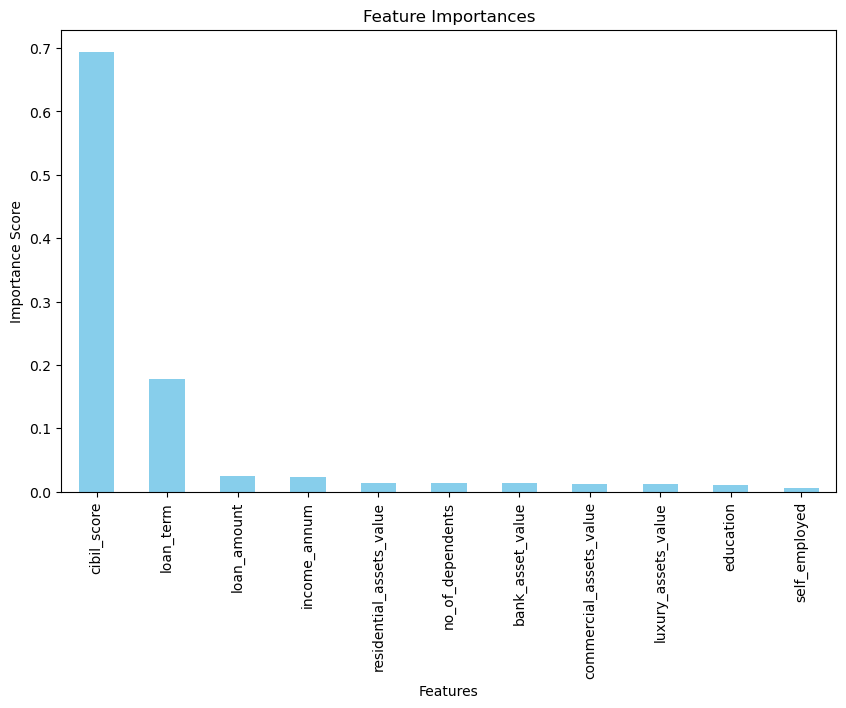

In [35]:
# Get feature importances from the trained model
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [36]:
# Select the top 8 features based on importance
top_features = feature_importances.nlargest(8).index.tolist()
print("Top 8 Features:", top_features)

# Create a new dataset with only the top 8 features
X_top = X[top_features]

Top 8 Features: ['cibil_score', 'loan_term', 'loan_amount', 'income_annum', 'residential_assets_value', 'no_of_dependents', 'bank_asset_value', 'commercial_assets_value']


In [37]:
from sklearn.model_selection import train_test_split

# Train-test split for the reduced feature dataset
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train_top.shape}")
print(f"Testing Features Shape: {X_test_top.shape}")

Training Features Shape: (3342, 8)
Testing Features Shape: (836, 8)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
clf_top = DecisionTreeClassifier(random_state=42)
clf_top.fit(X_train_top, y_train)

# Predict on the test set
y_pred_top = clf_top.predict(X_test_top)

# Evaluate the model
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Accuracy with Top 8 Features: {accuracy_top:.2f}")

# Detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_top))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_top))

Accuracy with Top 8 Features: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       315
           1       0.99      0.98      0.98       521

    accuracy                           0.98       836
   macro avg       0.97      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836


Confusion Matrix:
[[309   6]
 [ 13 508]]


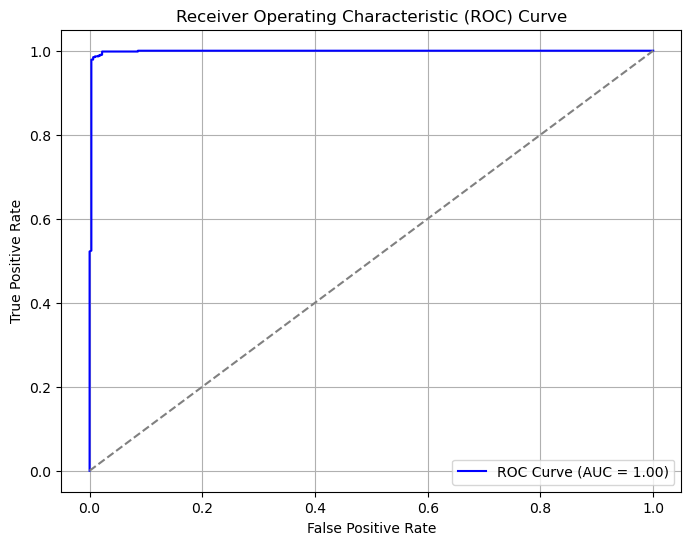

In [39]:
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (1)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [40]:
# Predictions for full feature set
y_pred_full = best_model.predict(X_test)

# Accuracy
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy (Full Features): {accuracy_full:.2f}")

# Precision, Recall, F1-Score
precision_full = precision_score(y_test, y_pred_full)
recall_full = recall_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full)

print(f"Precision: {precision_full:.2f}")
print(f"Recall: {recall_full:.2f}")
print(f"F1-Score: {f1_full:.2f}")

# ROC-AUC
y_pred_proba_full = best_model.predict_proba(X_test)[:, 1]
roc_auc_full = roc_auc_score(y_test, y_pred_proba_full)
print(f"ROC-AUC: {roc_auc_full:.2f}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_full))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_full))

Accuracy (Full Features): 0.98
Precision: 1.00
Recall: 0.98
F1-Score: 0.99
ROC-AUC: 1.00
Confusion Matrix:
[[313   2]
 [ 13 508]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       315
           1       1.00      0.98      0.99       521

    accuracy                           0.98       836
   macro avg       0.98      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836



In [41]:
# Predictions for reduced feature set
y_pred_top = clf_top.predict(X_test_top)

# Accuracy
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Accuracy (Top 8 Features): {accuracy_top:.2f}")

# Precision, Recall, F1-Score
precision_top = precision_score(y_test, y_pred_top)
recall_top = recall_score(y_test, y_pred_top)
f1_top = f1_score(y_test, y_pred_top)

print(f"Precision: {precision_top:.2f}")
print(f"Recall: {recall_top:.2f}")
print(f"F1-Score: {f1_top:.2f}")

# ROC-AUC
y_pred_proba_top = clf_top.predict_proba(X_test_top)[:, 1]
roc_auc_top = roc_auc_score(y_test, y_pred_proba_top)
print(f"ROC-AUC: {roc_auc_top:.2f}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_top))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_top))

Accuracy (Top 8 Features): 0.98
Precision: 0.99
Recall: 0.98
F1-Score: 0.98
ROC-AUC: 0.98
Confusion Matrix:
[[309   6]
 [ 13 508]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       315
           1       0.99      0.98      0.98       521

    accuracy                           0.98       836
   macro avg       0.97      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836



In [42]:
import pickle

# Save the trained model
model_filename = "trained_xgboost_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")

Model saved to trained_xgboost_model.pkl
